Analysis of free PMC papers (https://ftp.ncbi.nlm.nih.gov/pub/wilbur/BioC-PMC) containing github links.
TODOs:
1) Look on article authors; how do they change prefered languages?
2) same but for github users
3) check frequent language combinations
4) cluster keywords by co-occurenece to evide redundancy
5) filter (or weight?) data by a) number of repositories mentioned in paper b) number of papers that mention the repository

Known issues:
1) PMC paper not necessary provides publication of given repository, it just a first reference. Still make sence if we use the procedure just to get list of biological repositories. But keyword analysis may be affected: tool development and usage may be confused (see STAR and sickle examples below)

In [1]:
arts = readRDS('../rds/arts.table.final.rds')
gh2art = readRDS('../rds/gh2art.final.rds')
gh = readRDS('../rds/gh.table.final.rds')
lang.mat = readRDS('../rds/lang.mat.rds')
arts$keywords = tolower(arts$keywords)

In [2]:
cat('Number of papers:',nrow(arts),'\n')
cat('Number of github users :',length(unique(gh2art$user)),'\n')
cat('Number of repositories:',nrow(gh),'\n')
cat('Number of papers-2-repository links:',nrow(gh2art),'\n')
cat('Number of languages:',ncol(lang.mat),'\n')

Number of papers: 65366 
Number of github users : 35839 
Number of repositories: 58255 
Number of papers-2-repository links: 97763 
Number of languages: 463 


In [3]:
# some usefull functions
source('util.R')

In [4]:
# articles, repositories and link between them
arts[1:2,]

,pmid,year,title,keywords,gh.count
,<chr>,<chr>,<chr>,<chr>,<dbl>
PMC2904649,20622843,2011,Cloud Computing and the DNA Data Race,NA,1
PMC2837031,20167070,2010,Finding sRNA generative locales from high-throughput sequencing data with NiBLS,NA,1


In [5]:
gh[1:2,]

,created_at,language,updated_at,pushed_at,git_url,most.freq.lang,art.count,earliest.pmc,earliest.pmc.year
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
davek44.error_correction,2009-12-27T21:51:25Z,C++,2017-05-17T17:47:38Z,2017-05-17T17:47:36Z,git://github.com/davek44/Quake.git,C++,1,PMC2904649,2011
danmaclean.NiBLS,2010-02-15T20:59:07Z,Perl,2018-03-18T13:25:15Z,2010-02-19T08:32:38Z,git://github.com/danmaclean/NiBLS.git,Perl,1,PMC2837031,2010


In [6]:
gh2art[1:2,]

,user,rep,pmc,id,year
,<chr>,<chr>,<chr>,<chr>,<dbl>
PMC2904649,davek44,error_correction,PMC2904649,davek44.error_correction,2011
PMC2837031,danmaclean,NiBLS,PMC2837031,danmaclean.NiBLS,2010


In [7]:
# there are repositories mentioned many times
sort(table(gh2art$id),decreasing = T)[1:10]


         najoshi.sickle          alexdobin.STAR               lh3.seqtk 
                    944                     770                     521 
        jstjohn.SeqPrep         tseemann.snippy       tseemann.abricate 
                    423                     407                     363 
FelixKrueger.TrimGalore          fchollet.keras         rrwick.Porechop 
                    338                     337                     333 
            taoliu.MACS 
                    322 

In [8]:
p = arts[gh2art$pmc[gh2art$id=='alexdobin.STAR'],]
p[order(p$year)[1:3],]
# STAR was actually published in 2013 (PMC3530905); but the repository was first mentioned in 2015..
gh['alexdobin.STAR',]
# the repository was created in 2014

,pmid,year,title,keywords,gh.count
,<chr>,<chr>,<chr>,<chr>,<dbl>
PMC4587370,26451251,2015,De novo transcriptome profiling of highly purified human lymphocytes primary cells,long non-coding rnas gene expression analysis rna sequencing cd4-positive t cells,3
PMC4631051,26334920,2016,Mapping RNA-seq Reads with STAR,sequence alignment reads mapping rna-seq transcriptome spliced alignment star,2
PMC4819192,27041210,2016,Tracking of Normal and Malignant Progenitor Cell Cycle Transit in a Defined Niche,NA,1


,created_at,language,updated_at,pushed_at,git_url,most.freq.lang,art.count,earliest.pmc,earliest.pmc.year
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
alexdobin.STAR,2014-03-15T15:47:05Z,C,2022-04-05T01:04:22Z,2022-03-17T10:33:10Z,git://github.com/alexdobin/STAR.git,C,770,PMC4587370,2015


In [9]:
p = arts[gh2art$pmc[gh2art$id=='najoshi.sickle'],]
p[order(p$year)[1:3],]
# 2011 was actually published in 2011
gh['najoshi.sickle',]

,pmid,year,title,keywords,gh.count
,<chr>,<chr>,<chr>,<chr>,<dbl>
PMC3558522,23382987,2013,"A Phylogeny of Birds Based on Over 1,500 Loci Collected by Target Enrichment and High-Throughput Sequencing",NA,5
PMC3583458,23450226,2013,PolyCat: A Resource for Genome Categorization of Sequencing Reads From Allopolyploid Organisms,read mapping polyploid cotton snp homoeo-snp,2
PMC3599046,23363372,2013,Comparison and contrast of genes and biological pathways responding to Marek’s disease virus infection using allele-specific expression and differential expression in broiler and layer chickens,marek’s disease genetic resistance rna-seq allele-specific expression biological pathways,1


,created_at,language,updated_at,pushed_at,git_url,most.freq.lang,art.count,earliest.pmc,earliest.pmc.year
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
najoshi.sickle,2011-02-09T01:18:45Z,C,2022-03-28T00:42:45Z,2017-05-08T19:30:59Z,git://github.com/najoshi/sickle.git,C,944,PMC3558522,2013


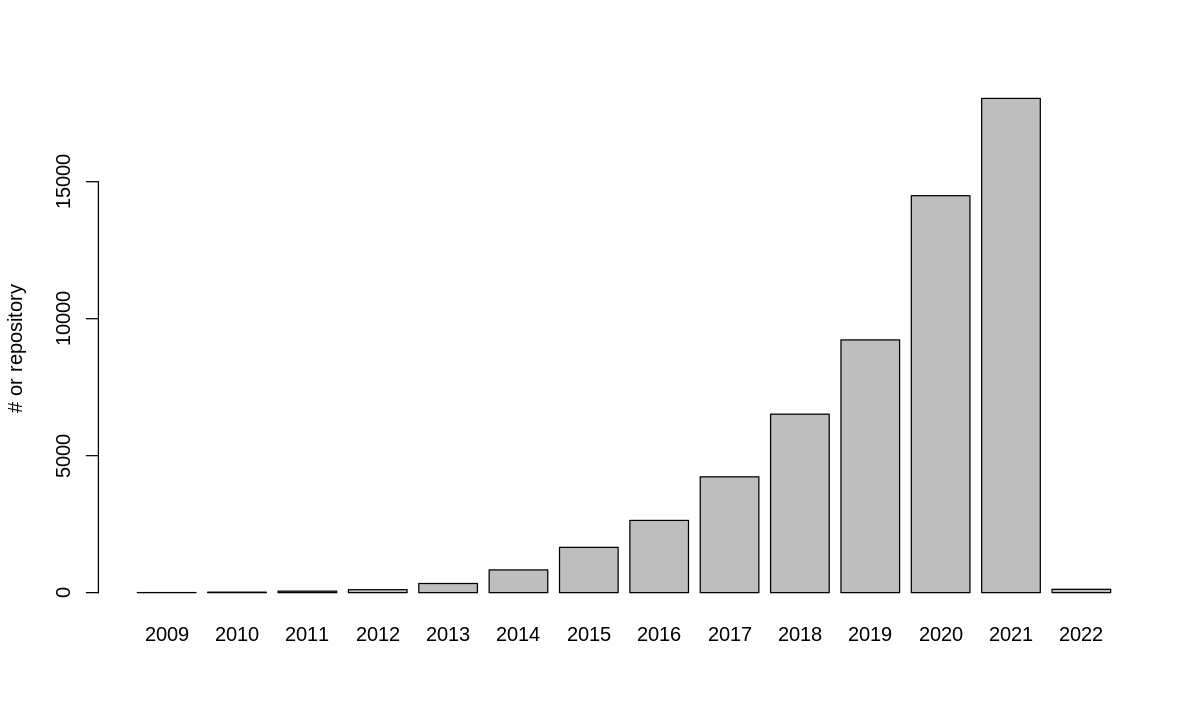

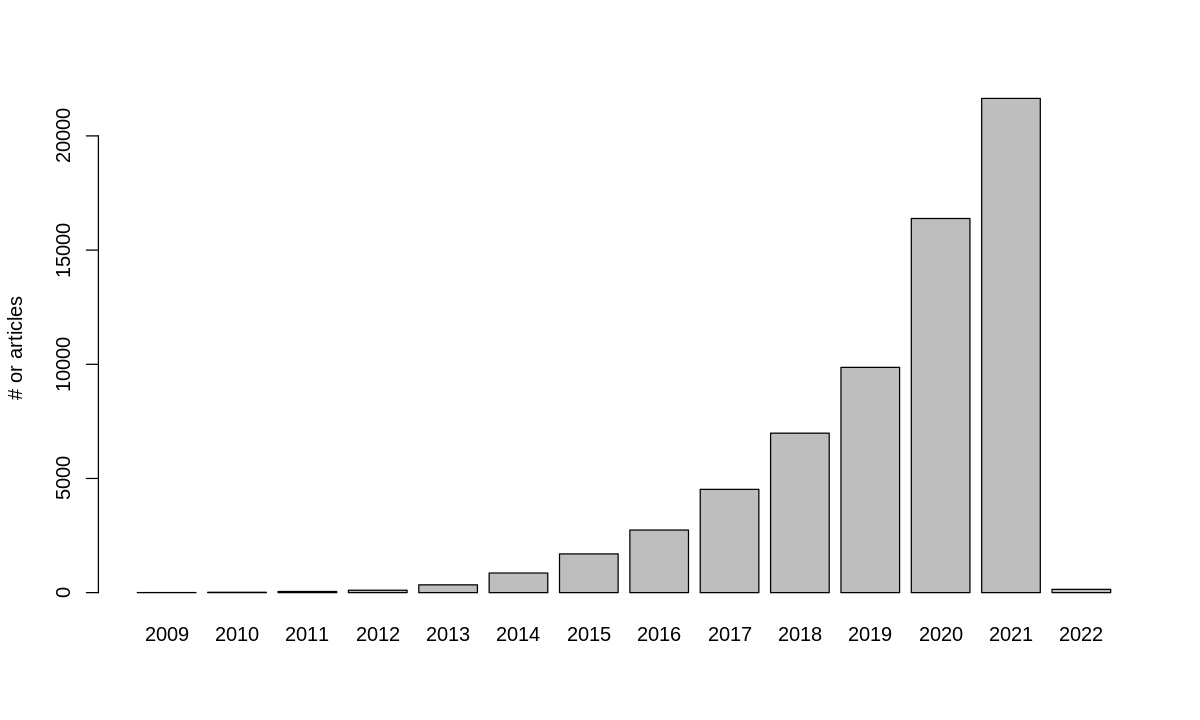

In [69]:
options(repr.plot.width=10, repr.plot.height=6)
# repositories per year
barplot(table(gh$earliest.pmc.year),log='',ylab='# or repository')
barplot(table(as.numeric(arts$year)),log='',ylab='# or articles')

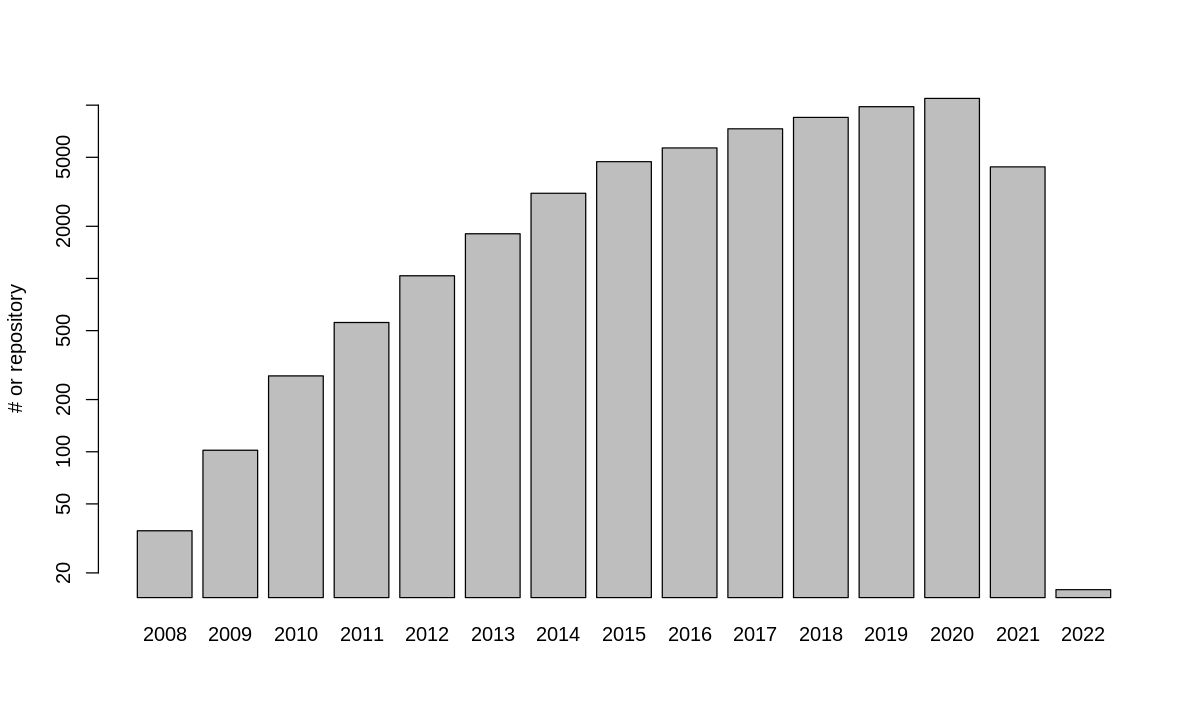

In [70]:
barplot(table(as.numeric(substr(gh$created_at,1,4))),log='y',ylab='# or repository')

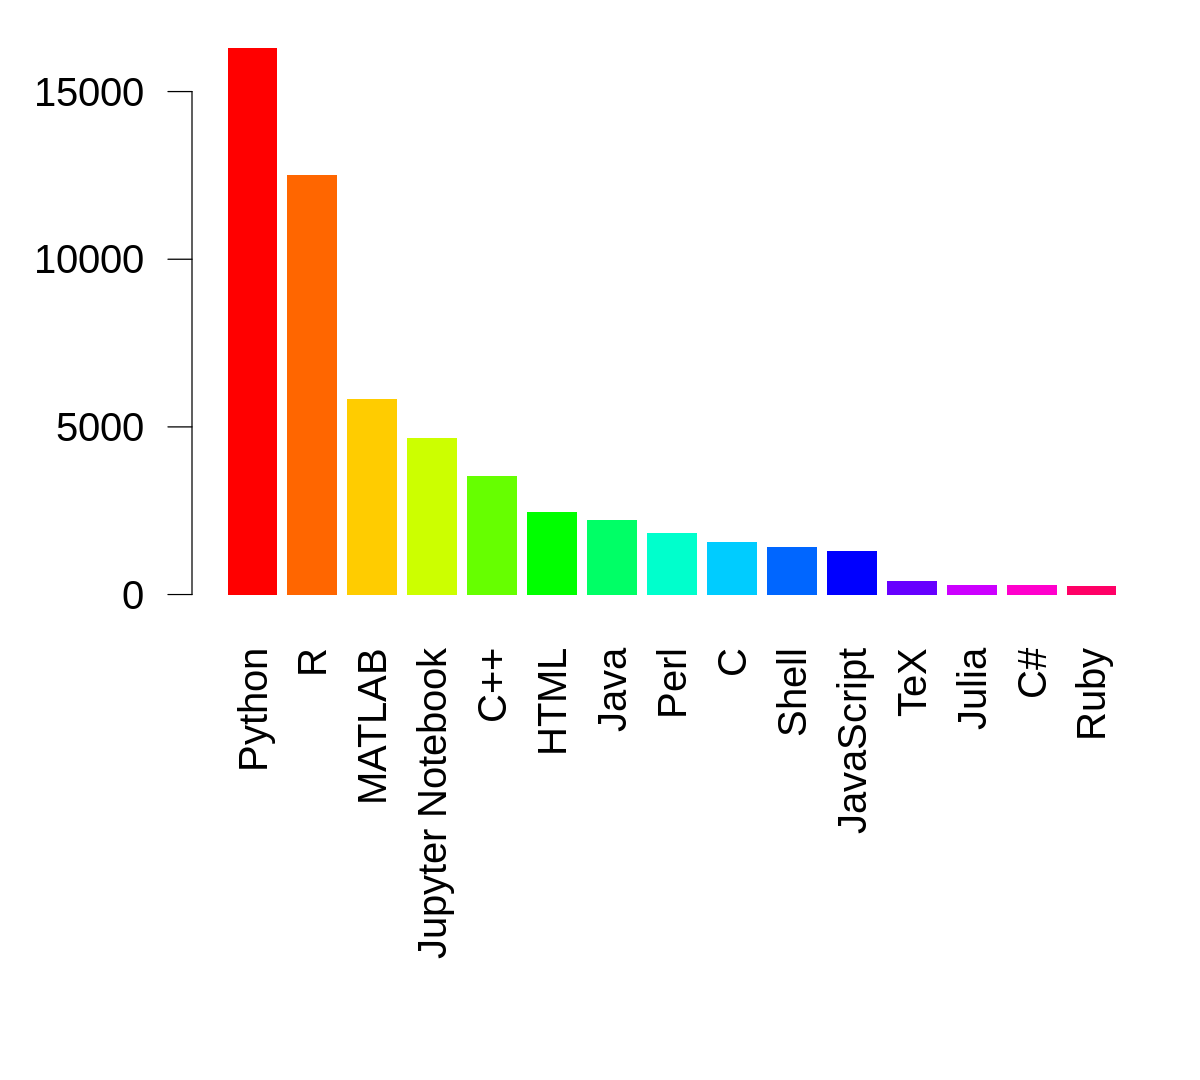

In [101]:
options(repr.plot.width=10, repr.plot.height=9)
par(mar=c(10,4,1,1),cex=2)
lfreq = sort(table(gh$most.freq.lang),decreasing = T)[1:15]
col15 = rainbow(15)
names(col15) = names(lfreq)
barplot(lfreq,col=col15,border=NA,las=2)

In [11]:
# gh$language is repository language specified by github
# lang.mat is a repository2lang matrix given ammount (bytes?) of each language in the given repository
# gh$most.freq.lang most used language (according to lang.mat)
# in most cases language is the same
table(gh$language==gh$most.freq.lang)


FALSE  TRUE 
 1729 56296 

In [12]:
# there is a publication date (yearliest pmc publication that mentions the repository, gh$year) and date of repository creation
table(publication=gh$earliest.pmc.year,created.at=as.numeric(substr(gh$created_at,1,4)))

           created.at
publication 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
       2009    1    2    0    0    0    0    0    0    0    0    0    0    0
       2010    3    4   10    0    0    0    0    0    0    0    0    0    0
       2011    0   10   23   21    1    0    0    0    0    0    0    0    0
       2012    1    4   18   47   36    1    0    1    1    0    0    0    0
       2013    5    8   28   55  123  110    3    0    2    0    0    0    0
       2014    3    8   25   69  148  294  268    5    4    3    0    0    3
       2015    3    5   26   52  131  271  552  597    4    4    4    3    0
       2016    2    9   23   62  106  213  495  982  720    9    7    5    2
       2017    2   13   21   41  109  182  388  817 1430 1189   20    8    4
       2018    4   11   20   44  110  186  393  686 1113 2091 1816   24   10
       2019    4    7   22   42   95  168  346  583  907 1650 2863 2487   32
       2020    4    9   35   63  102  197  349  577  7

In [13]:
# try pmc date
t = as.matrix(table(gh$language,gh$earliest.pmc.year))
t = t[order(apply(t,1,sum),decreasing = T),]
t[1:5,1:6]
tn = sweep(t,2,apply(t,2,sum),'/')*100
apply(t,2,sum)
tn = tn[,apply(t,2,sum)>199]

                  
                   2009 2010 2011 2012 2013 2014
  Python              1    4   14   32   85  201
  R                   0    0    3    4   28   99
  Jupyter Notebook    0    0    0    0    4   12
  MATLAB              0    0    0    1    1    8
  C++                 0    0    5   13   29   90

2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021 
    3    17    55   109   334   829  1652  2636  4226  6509  9191 14404 17938 
 2022 
  122

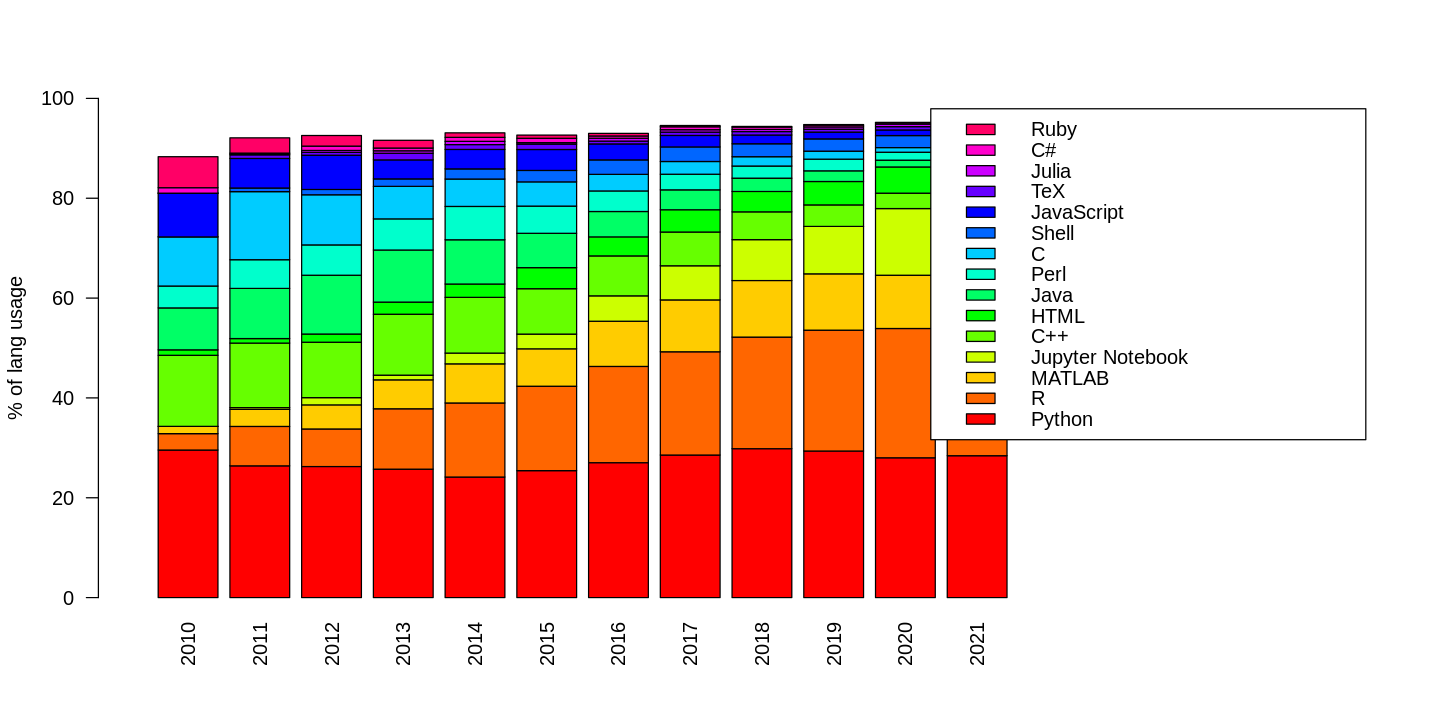

In [88]:
options(repr.plot.width=12, repr.plot.height=6)
barplot(tn[1:15,],col=rainbow(15),ylab='% of lang usage',legend.text = T,xlim=c(0,20),las=2,ylim=c(0,100))

Try language with highest frequency in given repository

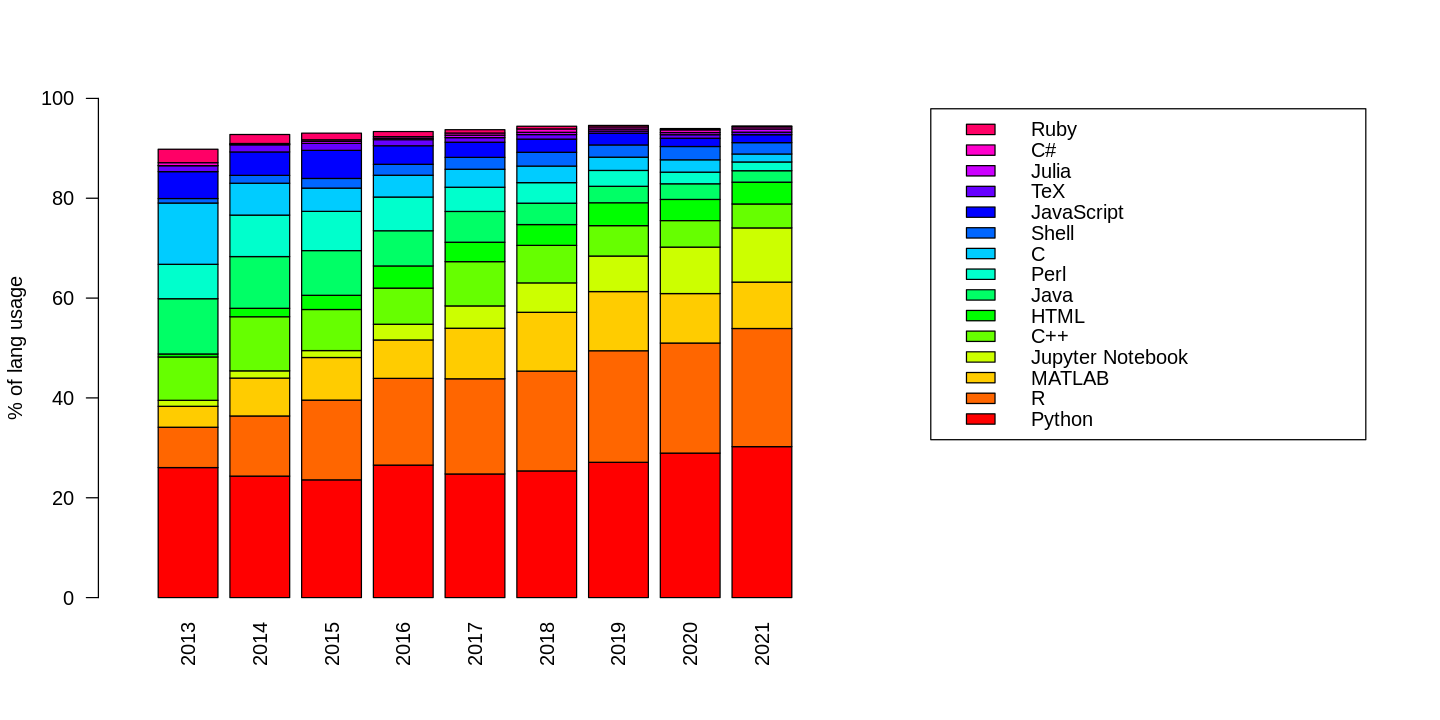

In [15]:
t = as.matrix(table(gh$most.freq.lang,gh$earliest.pmc.year))
t = t[order(apply(t,1,sum),decreasing = T),]
tn = sweep(t,2,apply(t,2,sum),'/')*100
tn = tn[,apply(t,2,sum)>199]
barplot(tn[1:15,],col=rainbow(15),ylab='% of lang usage',legend.text = T,xlim=c(0,20),las=2,ylim=c(0,100))

Take ammount of code into account

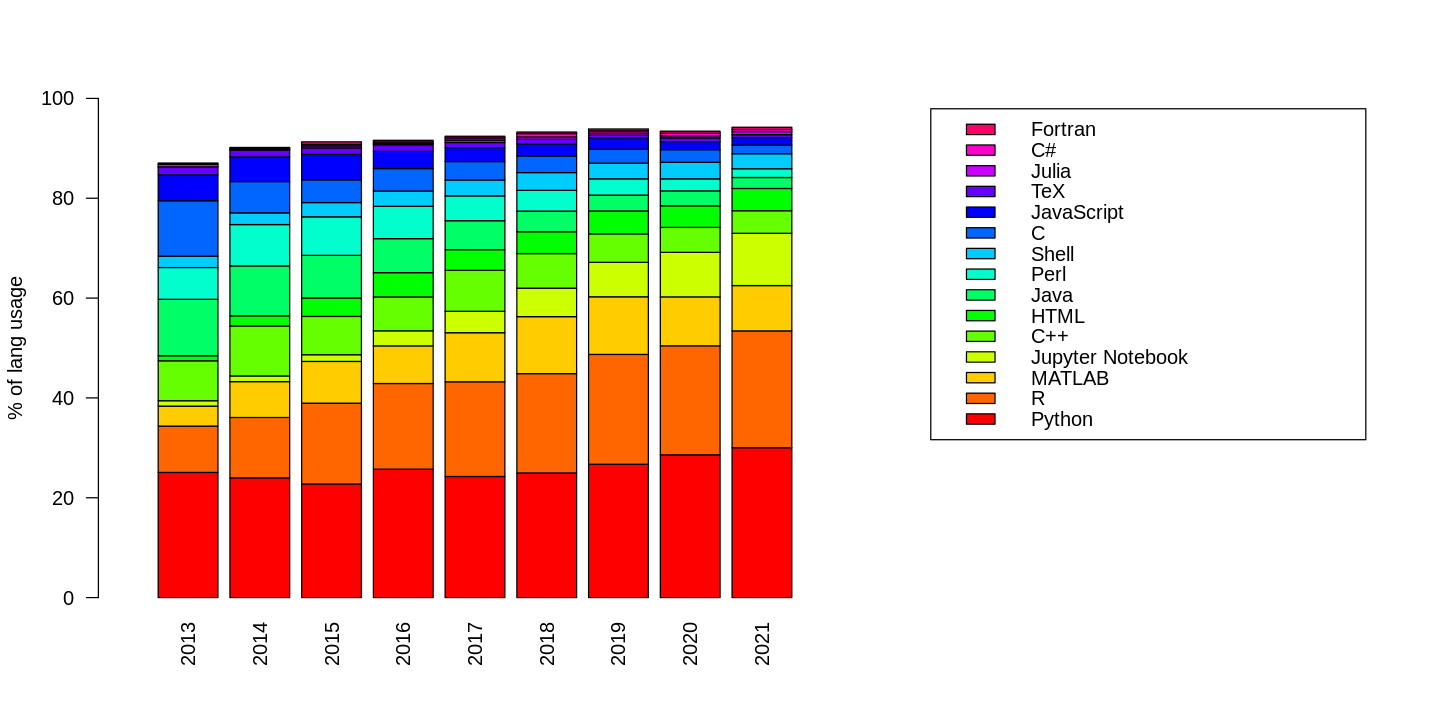

In [16]:
lang.matn = lang.mat
# norm to 1 for each repository
lang.matn = sweep(lang.matn,1,apply(lang.matn,1,sum),'/')
t = sapply(split.data.frame(lang.matn,arts[gh$earliest.pmc,'year']),function(x)apply(x,2,sum))
t = t[,as.character(2013:2021)]
t = t[order(apply(t,1,sum),decreasing = T),]
tn = sweep(t,2,apply(t,2,sum),'/')*100
barplot(tn[1:15,],col=rainbow(15),ylab='% of lang usage',legend.text = T,xlim=c(0,20),las=2,ylim=c(0,100))  

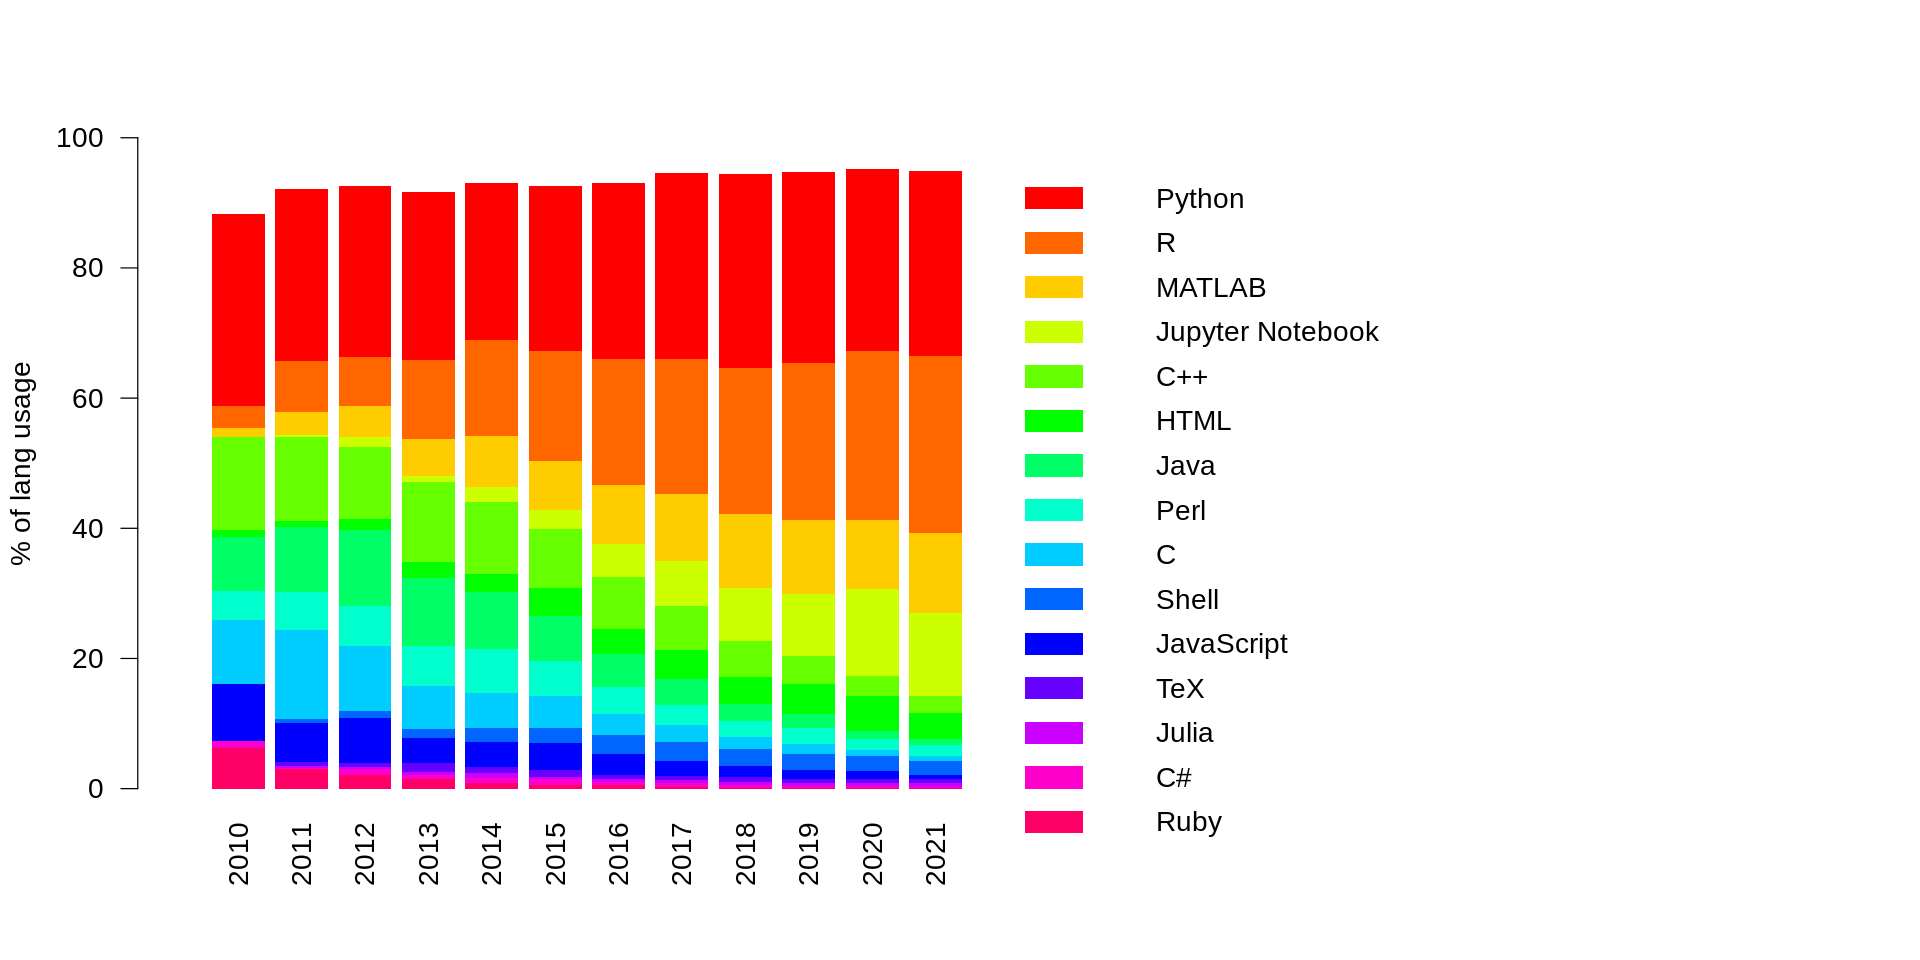

In [104]:
# Use repository creation date instead of publication
# from the analysis above I think this is the most resonable approach
options(repr.plot.width=16, repr.plot.height=8)
t = as.matrix(table(gh$most.freq.lang,as.numeric(substr(gh$created_at,1,4))))
t = t[order(apply(t,1,sum),decreasing = T),]
tn = sweep(t,2,apply(t,2,sum),'/')*100
tn = tn[,apply(t,2,sum)>199]
par(cex=1.4)
barplot(tn[15:1,],col=col15[rownames(tn)[15:1]],border=NA,ylab='% of lang usage',legend.text = T,xlim=c(0,30),las=2,ylim=c(0,100),args.legend = list(border=NA,bty='n'))

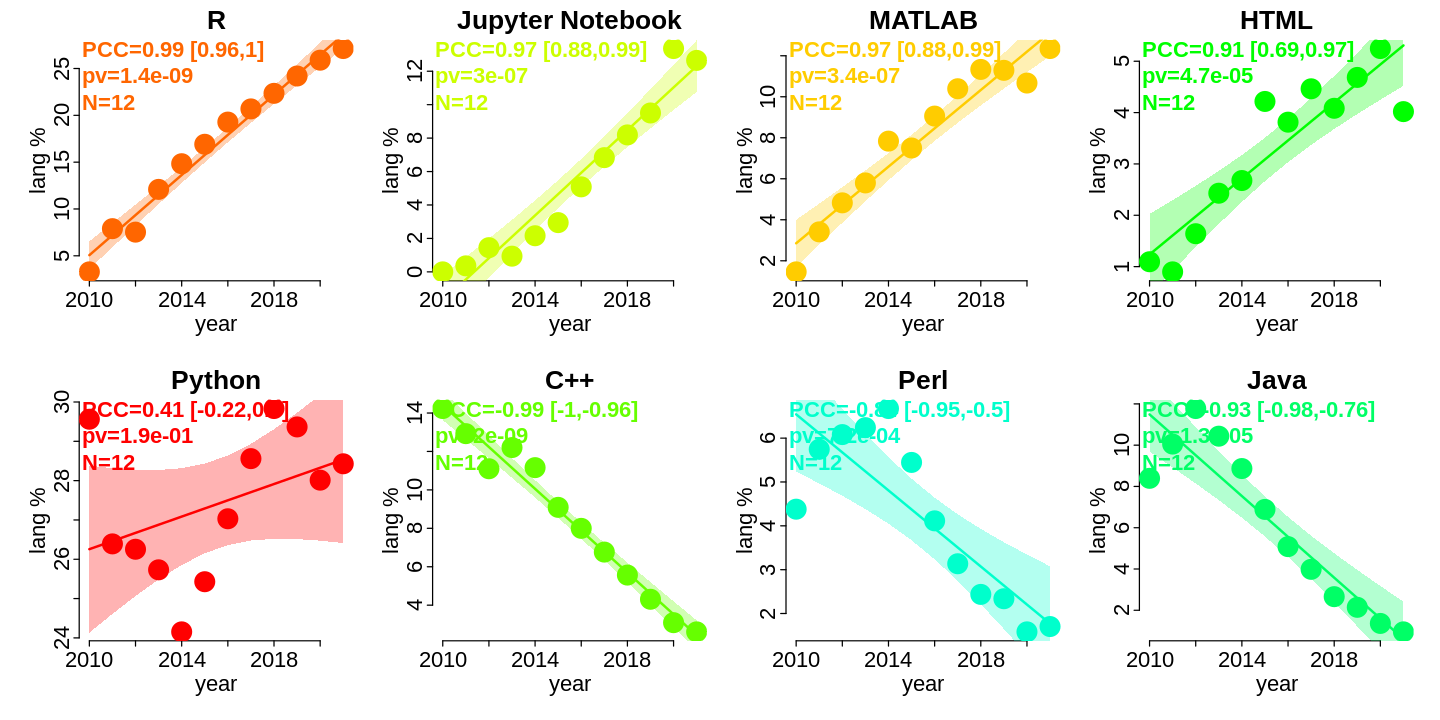

In [108]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(2,4),tcl=-0.2,mgp=c(1.1,0.2,0),mar=c(3,3,1.5,0),oma=c(0,0,0,1),bty='n',cex=1.1)
langs = c('R','Jupyter Notebook','MATLAB','HTML','Python','C++','Perl','Java')
for(l in langs)
    plotLine(colnames(tn),tn[l,],pch=19,xlab='year',ylab='lang %',cex=2,line.lwd = 2,plot.ci = T,main=l,col=col15[l],line.col = col15[l])


In [19]:
y = as.numeric(colnames(tn))
pv=data.frame(t(apply(tn,1,function(x){
 ct = cor.test(x,y)
 c(pcc=ct$estimate,p=ct$p.value)
})))
pv$fdr = p.adjust(pv$p,m='BH')
pv = pv[order(pv$p),]
table(pv$fdr<0.05,sign(pv$pcc))

       
         -1   1
  FALSE  64 121
  TRUE   10  14

In [20]:
# languages gaining popularity
pv[pv$fdr<0.05 & pv$pcc>0,]

,pcc.cor,p,fdr
,<dbl>,<dbl>,<dbl>
R,0.9887991,1.362674e-09,2.063826e-07
Jupyter Notebook,0.9667482,3.027625e-07,1.788238e-05
MATLAB,0.9659133,3.422466e-07,1.788238e-05
HTML,0.9067602,4.737444e-05,1.100140e-03
Stata,0.8709353,2.262057e-04,4.540947e-03
IGOR Pro,0.8694392,2.389972e-04,4.540947e-03
Stan,0.8574930,3.625691e-04,6.314744e-03
Nextflow,0.8407831,6.128154e-04,9.852185e-03
Mathematica,0.8156305,1.220003e-03,1.516028e-02


In [21]:
# languages losing popularity
pv[pv$fdr<0.05 & pv$pcc<0,]

,pcc.cor,p,fdr
,<dbl>,<dbl>,<dbl>
C++,-0.9879326,1.974953e-09,2.063826e-07
JavaScript,-0.9469705,3.020387e-06,1.262522e-04
C,-0.9297336,1.197943e-05,3.800738e-04
Java,-0.9288532,1.272974e-05,3.800738e-04
PHP,-0.9130750,3.372818e-05,8.811488e-04
Perl,-0.8352435,7.199883e-04,1.074840e-02
Ruby,-0.8171381,1.174097e-03,1.516028e-02
Objective-C,-0.8152074,1.233132e-03,1.516028e-02
Scala,-0.7575483,4.318445e-03,4.297881e-02


Keyword to language assotiation

[1] 46070


     learning    sequencing      analysis          data          gene 
         4709          3644          3590          3228          3020 
       cancer        genome       biology           and      genomics 
         2996          2586          2491          2474          2356 
      machine       network          cell computational          deep 
         2309          2233          2094          1959          1856 
     covid-19         model       disease        neural     evolution 
         1840          1807          1782          1754          1738 

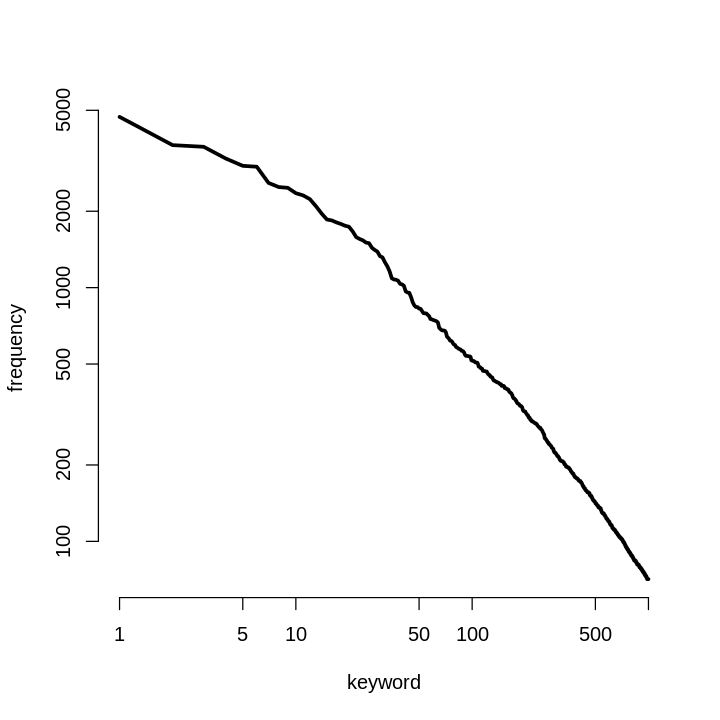

In [29]:
options(repr.plot.width=6, repr.plot.height=6)
kwds = sort(table(unlist(strsplit(arts$keywords,' +'))),decreasing = TRUE)
length(kwds)
kwds[1:20]
plot(as.numeric(kwds[1:1000]),log='yx',t='l',bty='n',lwd=3,xlab='keyword',ylab='frequency')

In [23]:
# so, keywords may be multiword, but there are no delimeters...
# hmm, I'll use just words
arts[grep('of',arts$keywords)[1:10],]$keywords

[1] "mass spectrometry data analysis search algorithms software cloud computing"                                                                           
 [2] "bone tomography image open source software morphometry"                                                                                               
 [3] "short reads read alignment snp calling cloud computing hadoop software package"                                                                       
 [4] "international commission on zoological nomenclature scratchpads bulletin of zoological nomenclature biostor biocode zoobank global names architecture"
 [5] "disomic inheritance polyploidy self-incompatibility software tetrasomic inheritance"                                                                  
 [6] "apoptosis modeling rule-based software engineering"                                                                                                   
 [7] "protein isoform alternative splicing alignment evolutionary rate positive selection"                                                                  
 [8] "clinical information systems medical informatics knowledge bases user-computer interface data display diffusion of innovation"                        
 [9] "bayesian modeling drift diffusion model python decision-making software"                                                                              
[10] "public health informatics mobile clinical decision support software development"

In [24]:
f = grepl('learning',arts[gh$earliest.pmc,'keywords'])
lngs=unique(gh$most.freq.lang)
pv = as.data.frame(do.call(rbind,lapply(lngs,function(l){
    ft = fisher.test(f,gh$most.freq.lang==l)
    c(or=ft$estimate,p=ft$p.value,n=sum(f & gh$most.freq.lang==l))
})))
pv$fdr = p.adjust(pv$p,m='BH')
rownames(pv) = lngs
dim(pv)
table(pv$fdr<0.05,pv$or>1)

[1] 209   4

       
        FALSE TRUE
  FALSE   173   22
  TRUE     11    3

In [25]:
pv[pv$fdr<0.05 & pv$or>1,]

,or.odds ratio,p,n,fdr
,<dbl>,<dbl>,<dbl>,<dbl>
Python,2.610772,2.131761e-188,2056,4.455381e-186
Jupyter Notebook,2.440926,3.971366e-76,692,2.766719e-74
Lua,5.160436,2.911250e-06,15,5.531375e-05


In [26]:
pv[pv$fdr<0.05 & pv$or<1,]

,or.odds ratio,p,n,fdr
,<dbl>,<dbl>,<dbl>,<dbl>
C++,0.6846378,3.130607e-07,184,6.542969e-06
Perl,0.1356653,6.862026e-37,20,3.585408e-35
Java,0.5349477,3.404873e-10,91,1.186031e-08
Ruby,0.3150753,1.310960e-03,6,2.107621e-02
JavaScript,0.4460733,2.761958e-09,45,7.215616e-08
C,0.5003913,9.086154e-09,60,2.110007e-07
R,0.3709262,4.114126e-99,412,4.299262e-97
Shell,0.1603630,2.300138e-26,18,9.614578e-25
HTML,0.5745887,2.345673e-09,108,7.003511e-08


In [27]:
pv['R',]

,or.odds ratio,p,n,fdr
,<dbl>,<dbl>,<dbl>,<dbl>
R,0.3709262,4.114126e-99,412,4.299262e-97


In [30]:
# lets test fisrt 200 most frequent keywords
#kw2lang = lapply(names(kwds)[1:200],function(k){
#    f = grepl(k,arts[gh$earliest.pmc,'keywords'])
#    lngs=unique(gh$most.freq.lang)
#    pv = as.data.frame(do.call(rbind,lapply(lngs,function(l){
#        ft = fisher.test(f,gh$most.freq.lang==l)
#        c(or=unname(ft$estimate),p=ft$p.value,n=sum(f & gh$most.freq.lang==l))
#    })))
#    pv$kw = k
#    pv$fdr = p.adjust(pv$p,m='BH')
#    pv$lang = rownames(pv) = lngs
#    pv
#})
#saveRDS(kw2lang,'../rds/kw2lang200.rds')
kw2lang = readRDS('../rds/kw2lang200.rds')

In [32]:
length(kw2lang)
kw2lang[[1]][1:4,]

[1] 200

,or,p,n,kw,fdr,lang
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
C++,0.6846378,3.130607e-07,184,learning,6.542969e-06,C++
Perl,0.1356653,6.862026e-37,20,learning,3.585408e-35,Perl
Java,0.5349477,3.404873e-10,91,learning,1.186031e-08,Java
Python,2.6107722,2.131761e-188,2056,learning,4.455381e-186,Python


In [33]:
kw2lang = do.call(rbind,kw2lang)
rownames(kw2lang) = NULL
kw2lang$l2or = log2(kw2lang$or)

In [34]:
kw2langs = kw2lang[kw2lang$fdr<0.05 & abs(kw2lang$l2or)>1,]
dim(kw2langs)

[1] 622   7

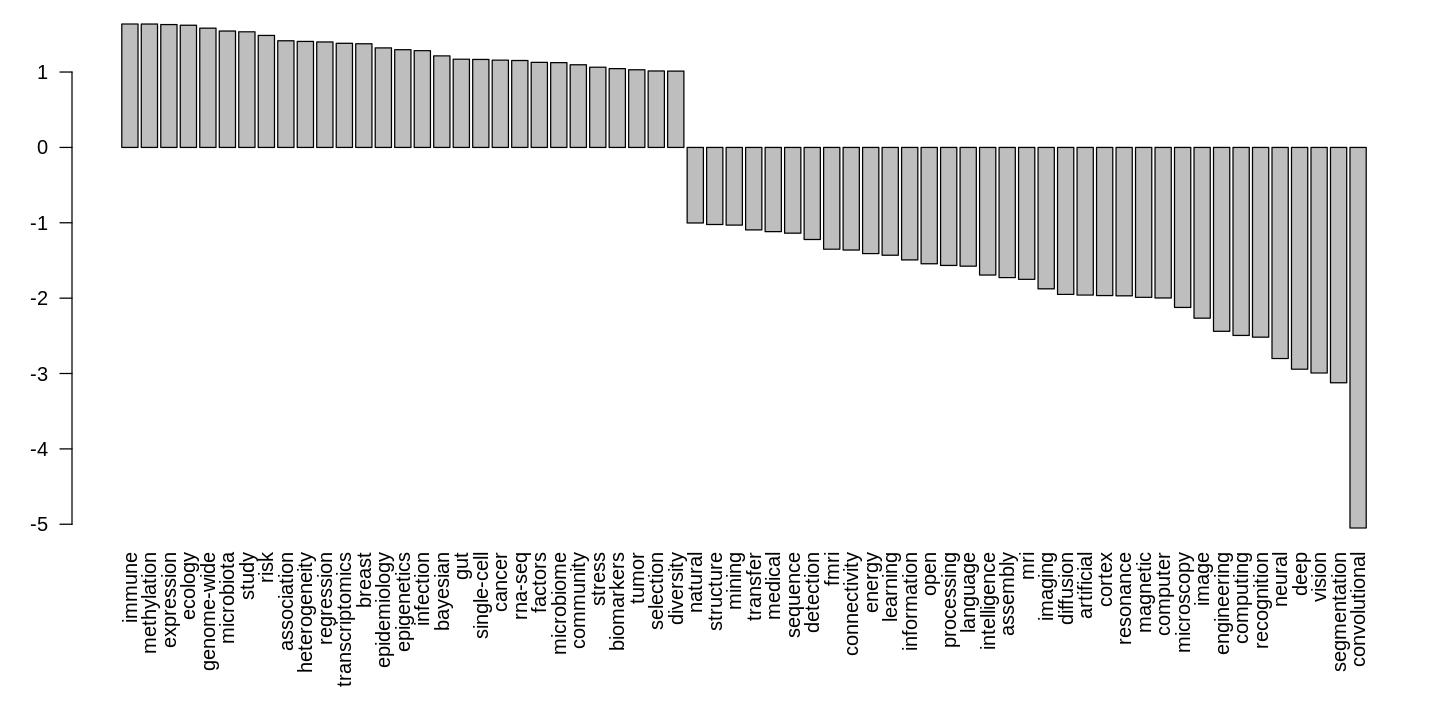

In [36]:
# keywords assotiated with R
options(repr.plot.width=12, repr.plot.height=6)
tmp = kw2langs[kw2langs$lang=='R',]
tmp = tmp[order(tmp$l2or,decreasing = T),]
par(mar=c(8,3,1,1))
barplot(tmp$l2or,names.arg = tmp$kw,las=2)

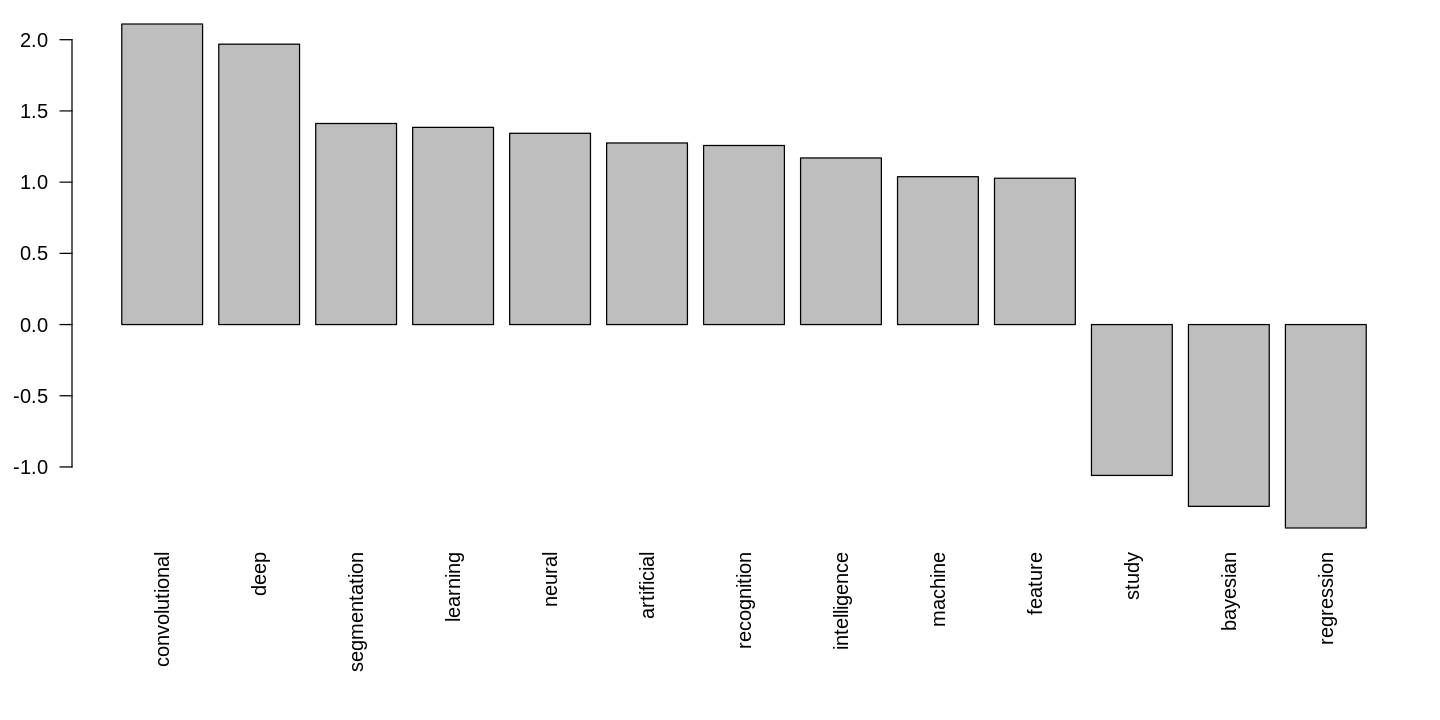

In [37]:
# keywords enrched in Python
tmp = kw2langs[kw2langs$lang=='Python',]
tmp = tmp[order(tmp$l2or,decreasing = T),]
par(mar=c(8,3,1,1))
barplot(tmp$l2or,names.arg = tmp$kw,las=2)

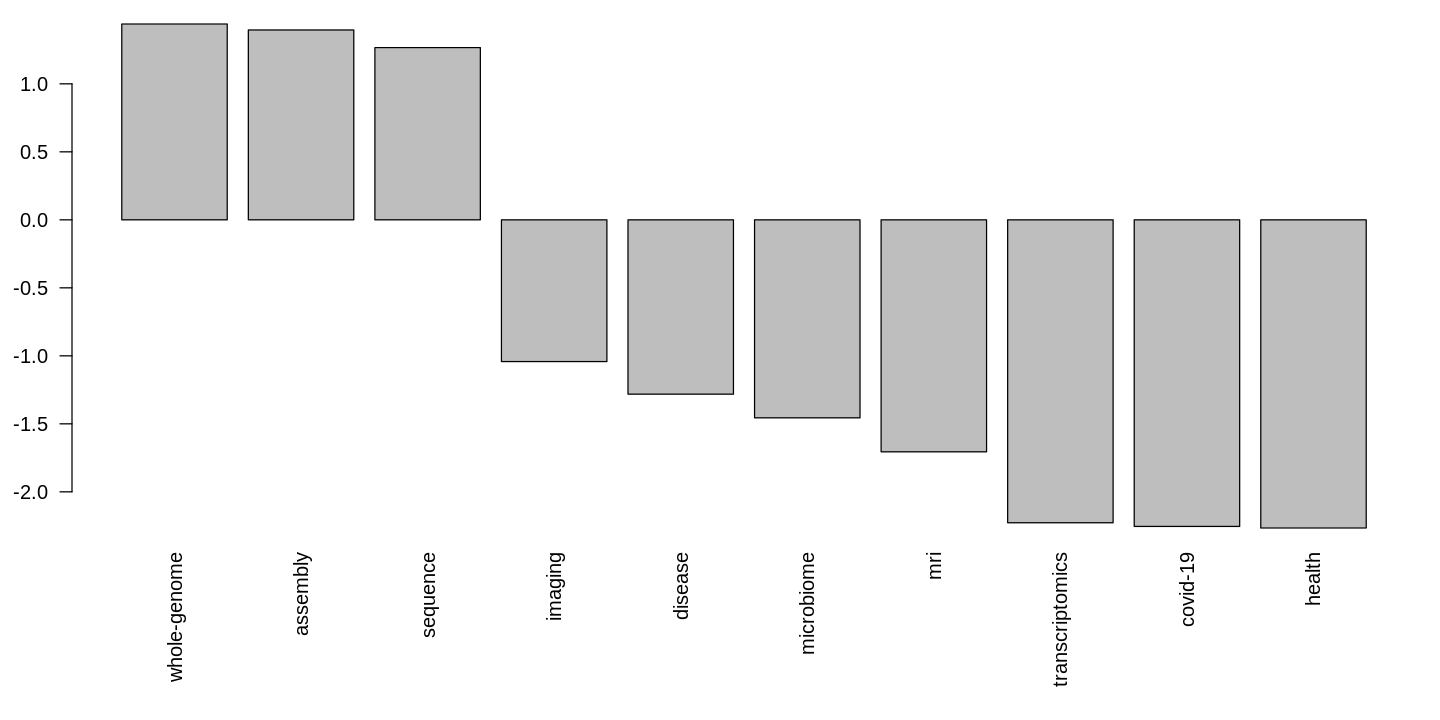

In [38]:
# keywords enrched in C
tmp = kw2langs[kw2langs$lang=='C',]
tmp = tmp[order(tmp$l2or,decreasing = T),]
par(mar=c(8,3,1,1))
barplot(tmp$l2or,names.arg = tmp$kw,las=2)

In [40]:
m=castXYtable(kw2langs$lang,kw2langs$kw,kw2langs$l2or)
dim(m)
m[1:3,1:5]


[1]  76 177

,analysis,and,annotation,artificial,assembly
AGS Script,NA,NA,NA,NA,NA
AMPL,NA,NA,NA,NA,NA
Arduino,NA,NA,NA,NA,NA


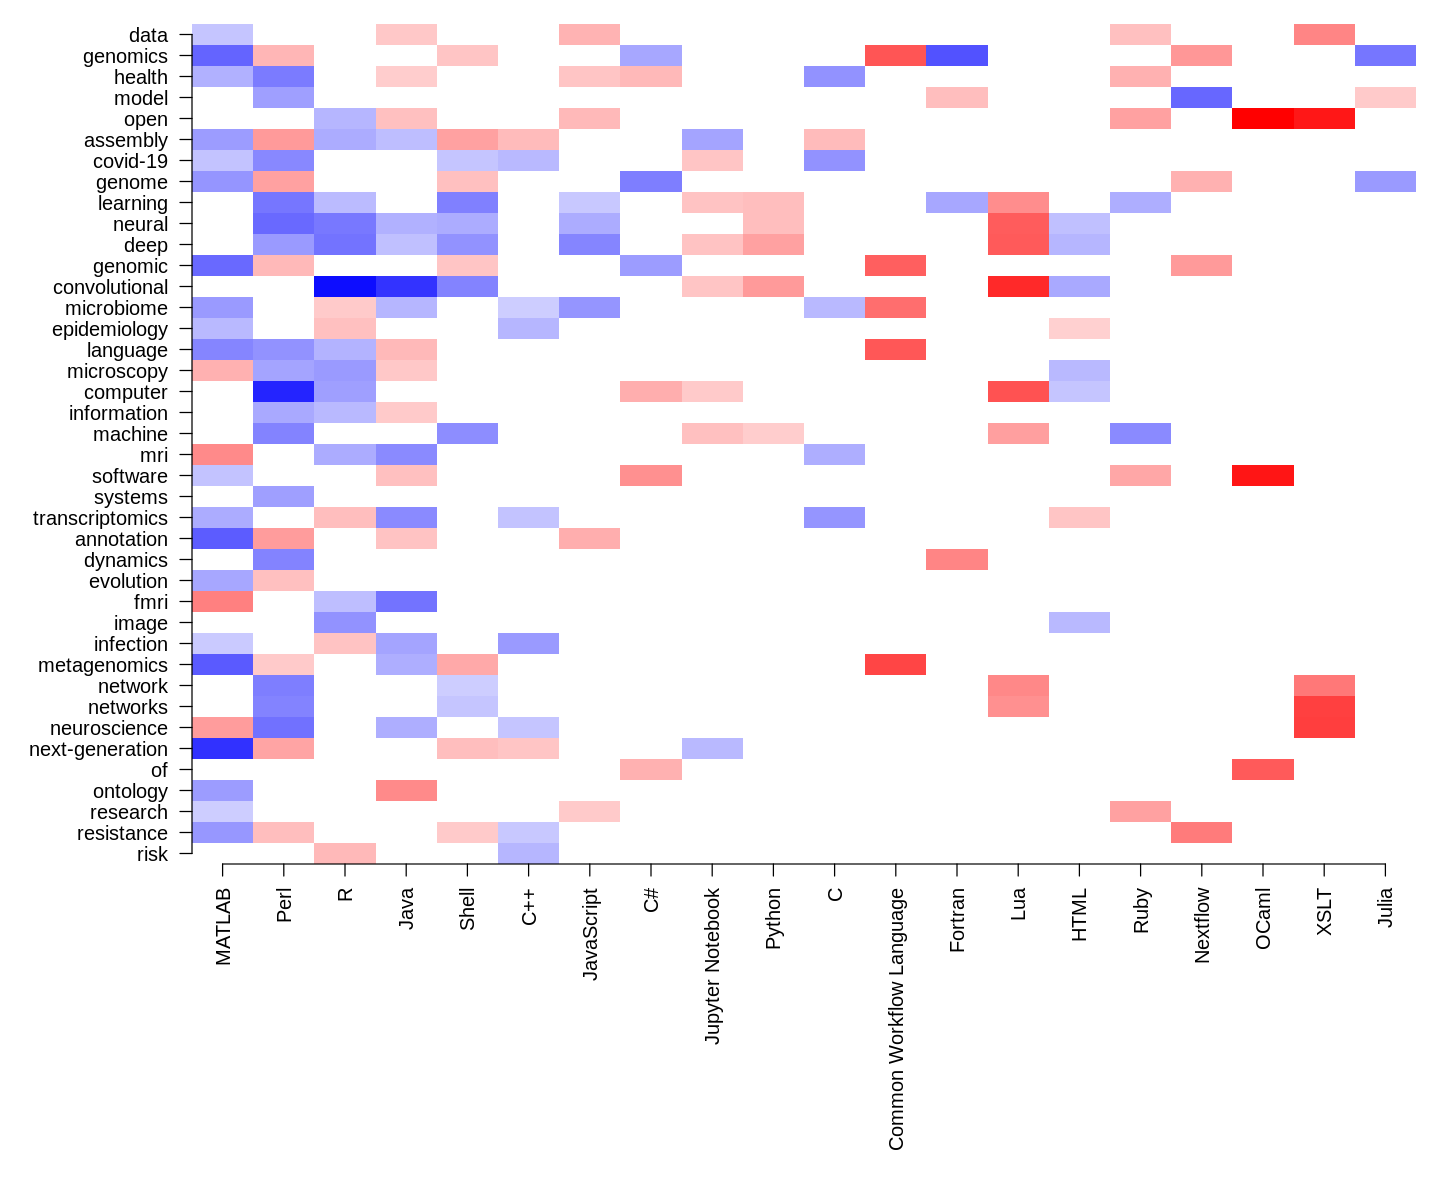

In [52]:
options(repr.plot.width=12, repr.plot.height=10)
par(mar=c(14,8,1,1),las=2)
mm = m
mm = mm[order(apply(is.na(mm),1,sum)),order(apply(is.na(mm),2,sum))]
mm = mm[1:20,40:1]
zmax = max(abs(mm[!is.infinite(mm)]),na.rm = T)
image(1:nrow(mm),1:ncol(mm),mm,xlab='',ylab='',bty='n',xaxt='n',yaxt='n',col=getPal(),zlim = c(-zmax,zmax))
axis(1,1:nrow(mm),rownames(mm))
axis(2,1:ncol(mm),colnames(mm))

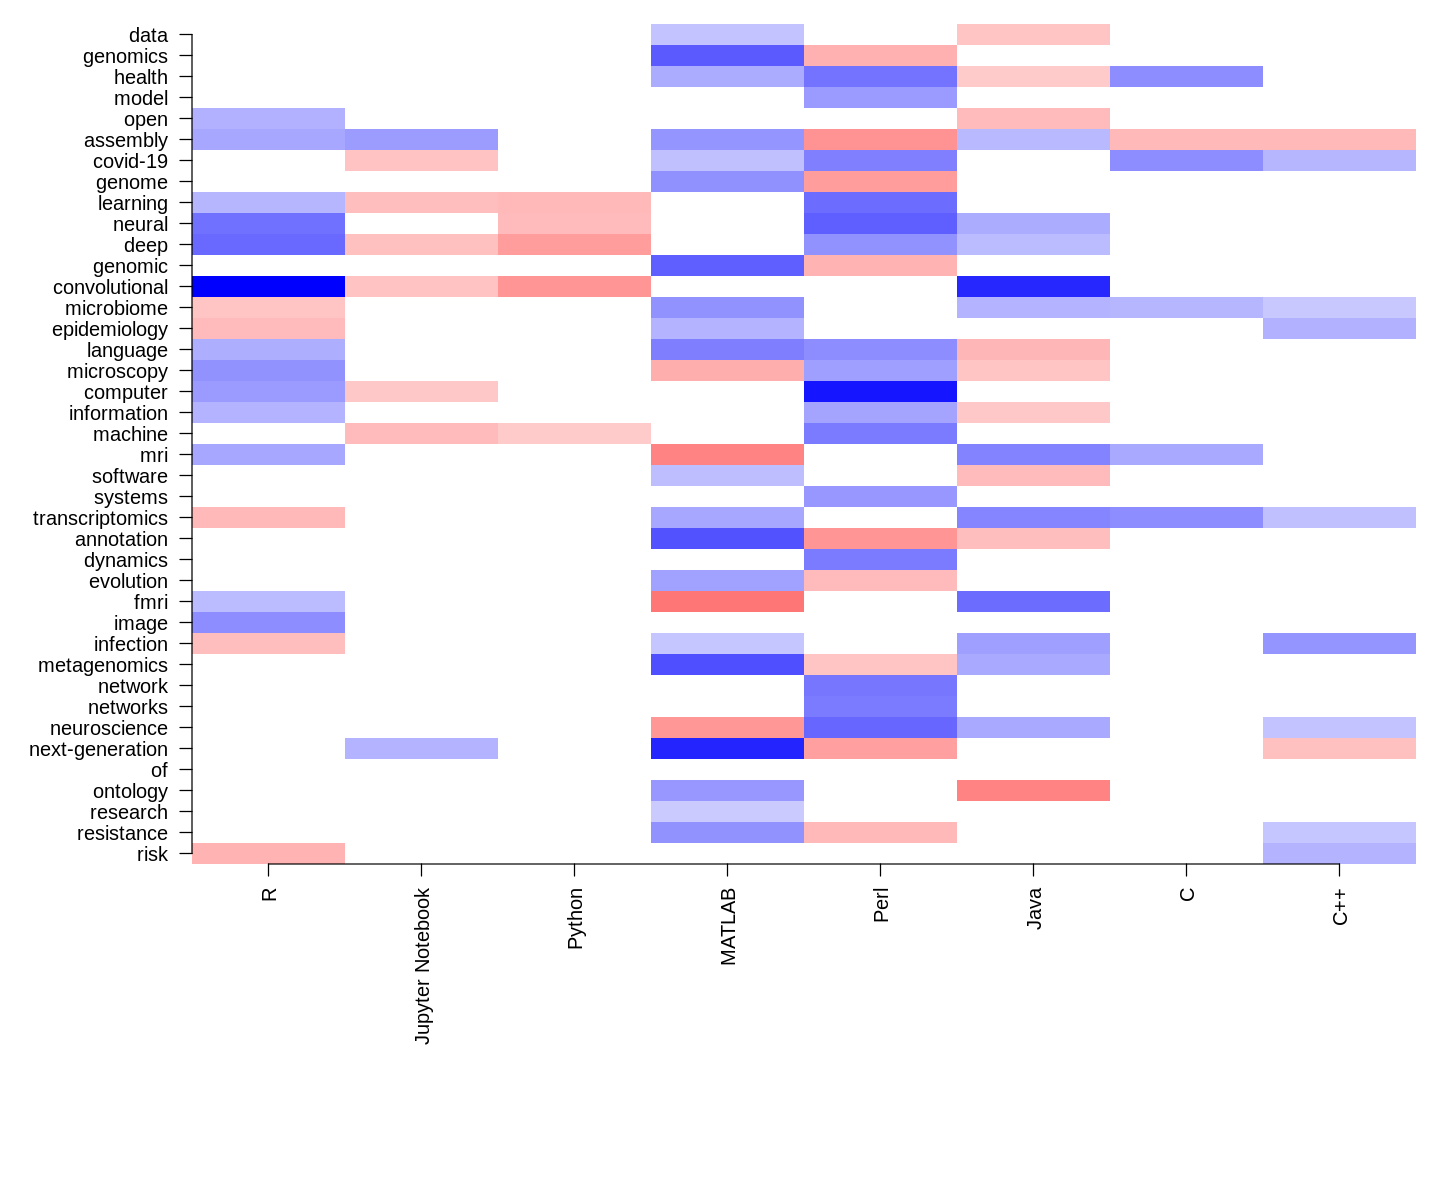

In [55]:
par(mar=c(14,8,1,1),las=2)
mm = m
mm = mm[order(apply(is.na(mm),1,sum)),order(apply(is.na(mm),2,sum))]
mm = mm[c('R','Jupyter Notebook','Python','MATLAB','Perl','Java','C','C++'),40:1]
zmax = max(abs(mm[!is.infinite(mm)]),na.rm = T)
image(1:nrow(mm),1:ncol(mm),mm,xlab='',ylab='',bty='n',xaxt='n',yaxt='n',col=getPal(),zlim = c(-zmax,zmax))
axis(1,1:nrow(mm),rownames(mm))
axis(2,1:ncol(mm),colnames(mm))

In [56]:
wm = m=castXYtable(kw2lang$lang,kw2lang$kw,kw2lang$l2or)
dim(wm)

[1] 209 200

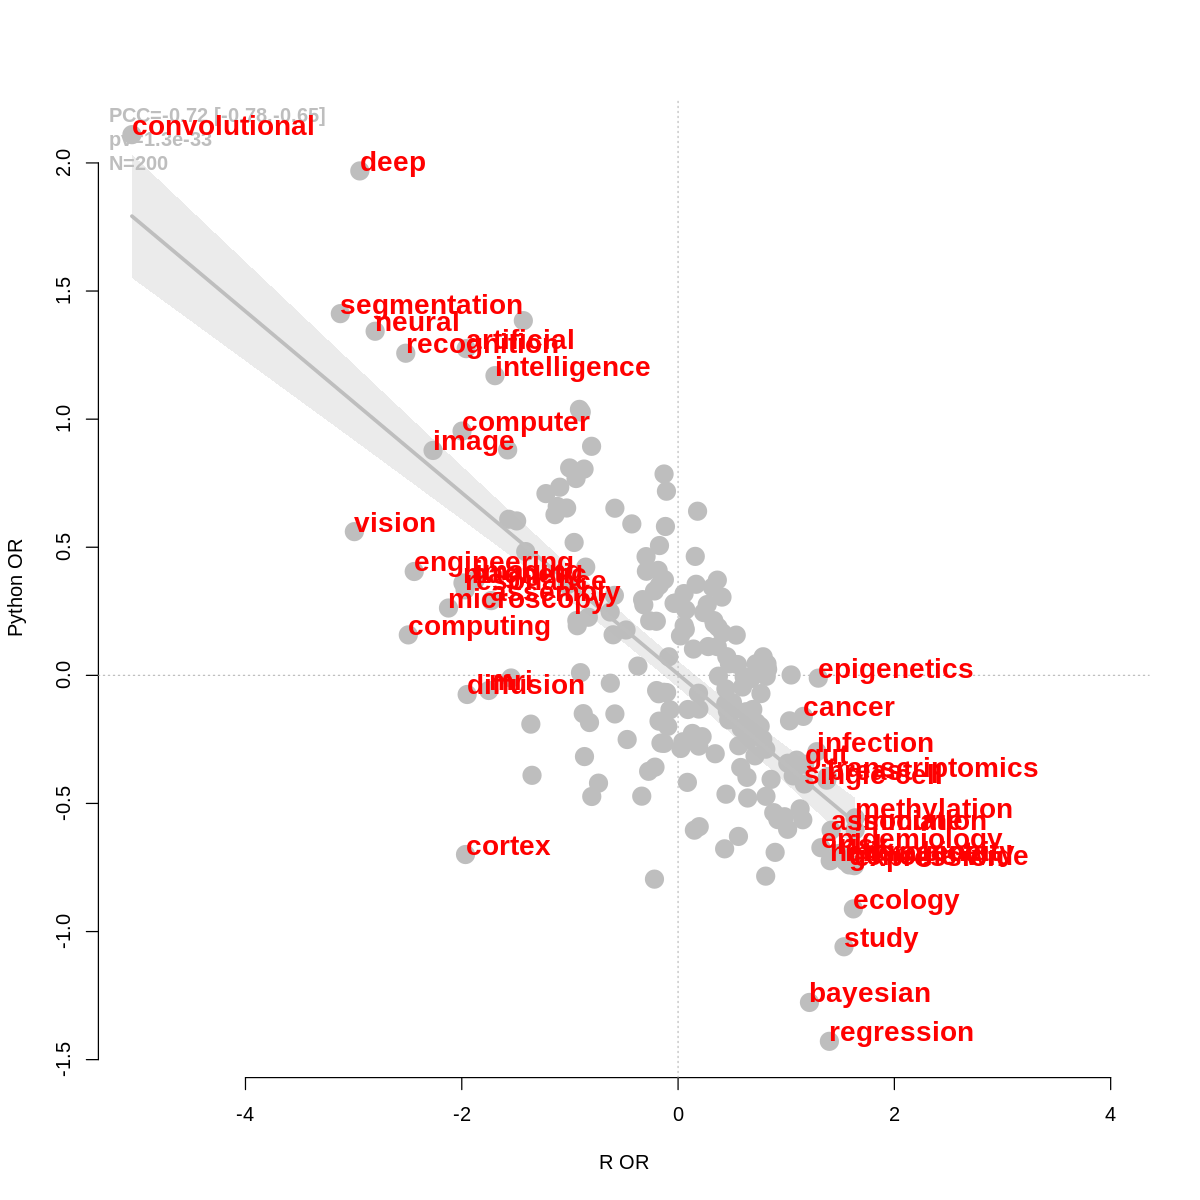

In [115]:
options(repr.plot.width=10, repr.plot.height=10)
#pdf('../r2python.kw.or.pdf',w=7,h=7)
plotLine(wm['R',],wm['Python',],bty='n',pch=19,col='gray',cex=2,line.lwd = 3,plot.ci = TRUE,xlab='R OR',ylab='Python OR',line.col = 'gray',xlim=c(-5,4))
abline(h=0,lty=3,col='gray')
abline(v=0,lty=3,col='gray')
top = wm['R',]
top = c(order(top,decreasing = T)[1:20],order(top,decreasing = F)[1:20])
text(wm['R',top],wm['Python',top],colnames(wm)[top],col='red',font=2,adj=c(0,0),cex=1.4)
#dev.off()

In [186]:
# are jnotebooks more similar to r or to python
cor(t(wm[c('R','Jupyter Notebook','Python'),]))
pairs(t(wm[c('R','Jupyter Notebook','Python'),]),diag.panel = function(x,y,...)plotLine(x,y,new = F,...),pch=16)

,R,Jupyter Notebook,Python
R,1.0000000,-0.4007411,-0.7227566
Jupyter Notebook,-0.4007411,1.0000000,0.3305285
Python,-0.7227566,0.3305285,1.0000000


In [159]:
# look on R-like and Python-like r/python usage dynamics
thr = log2(1.5)
rkw = kw2lang$kw[kw2lang$fdr<0.05 & kw2lang$lang=='R' & kw2lang$l2or>thr]
pkw = kw2lang$kw[kw2lang$fdr<0.05 & kw2lang$lang=='Python' & kw2lang$l2or>thr]

# r-related kw should be depleted in python and vice versa
rkw = intersect(rkw,kw2lang$kw[kw2lang$lang=='Python' & kw2lang$l2or< -thr])
pkw = intersect(pkw,kw2lang$kw[kw2lang$lang=='R' & kw2lang$l2or< -thr])

length(intersect(rkw,pkw))
intersect(rkw,pkw)

[1] 0

character(0)

In [149]:
# remove keywords that do not discriminate
rkw = setdiff(rkw,pkw)
pkw = setdiff(pkw,rkw)
length(intersect(rkw,pkw))

[1] 0

In [160]:
rkw

[1] "expression"    "ecology"       "cells"         "epidemiology" 
 [5] "association"   "bayesian"      "diversity"     "risk"         
 [9] "study"         "microbiota"    "genome-wide"   "immune"       
[13] "heterogeneity" "growth"        "regression"

In [161]:
pkw

[1] "learning"       "machine"        "network"        "deep"          
 [5] "neural"         "networks"       "processing"     "image"         
 [9] "detection"      "sequence"       "classification" "information"   
[13] "natural"        "convolutional"  "language"       "computer"      
[17] "medical"        "segmentation"   "artificial"     "mining"        
[21] "transfer"       "intelligence"   "recognition"    "feature"

In [162]:
pmc.rlike = grepl(paste(rkw,collapse='|'),arts$keywords)
pmc.plike = grepl(paste(pkw,collapse='|'),arts$keywords)
table(pmc.rlike)
table(pmc.plike)
table(pmc.plike,pmc.rlike)

pmc.rlike
FALSE  TRUE 
57750  7616 

pmc.plike
FALSE  TRUE 
53161 12205 

         pmc.rlike
pmc.plike FALSE  TRUE
    FALSE 46907  6254
    TRUE  10843  1362

In [163]:
fisher.test(pmc.plike,pmc.rlike)


	Fisher's Exact Test for Count Data

data:  pmc.plike and pmc.rlike
p-value = 0.06052
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8846112 1.0028293
sample estimates:
odds ratio 
 0.9421335 


In [164]:
type = setNames(rep('n',nrow(arts)),rownames(arts))
type[pmc.plike] = 'p'
type[pmc.rlike] = 'r'
type[pmc.rlike & pmc.plike] = 'b'
table(type)

type
    b     n     p     r 
 1362 46907 10843  6254 

In [165]:
nlang = gh$most.freq.lang
f = nlang %in% c('R','Python')
nlang[f] = paste0(nlang[f],'-',type[gh$earliest.pmc[f]])
table(nlang[f])


Python-b Python-n Python-p Python-r      R-b      R-n      R-p      R-r 
     353    10804     4314      829      361     8878     1175     2108 

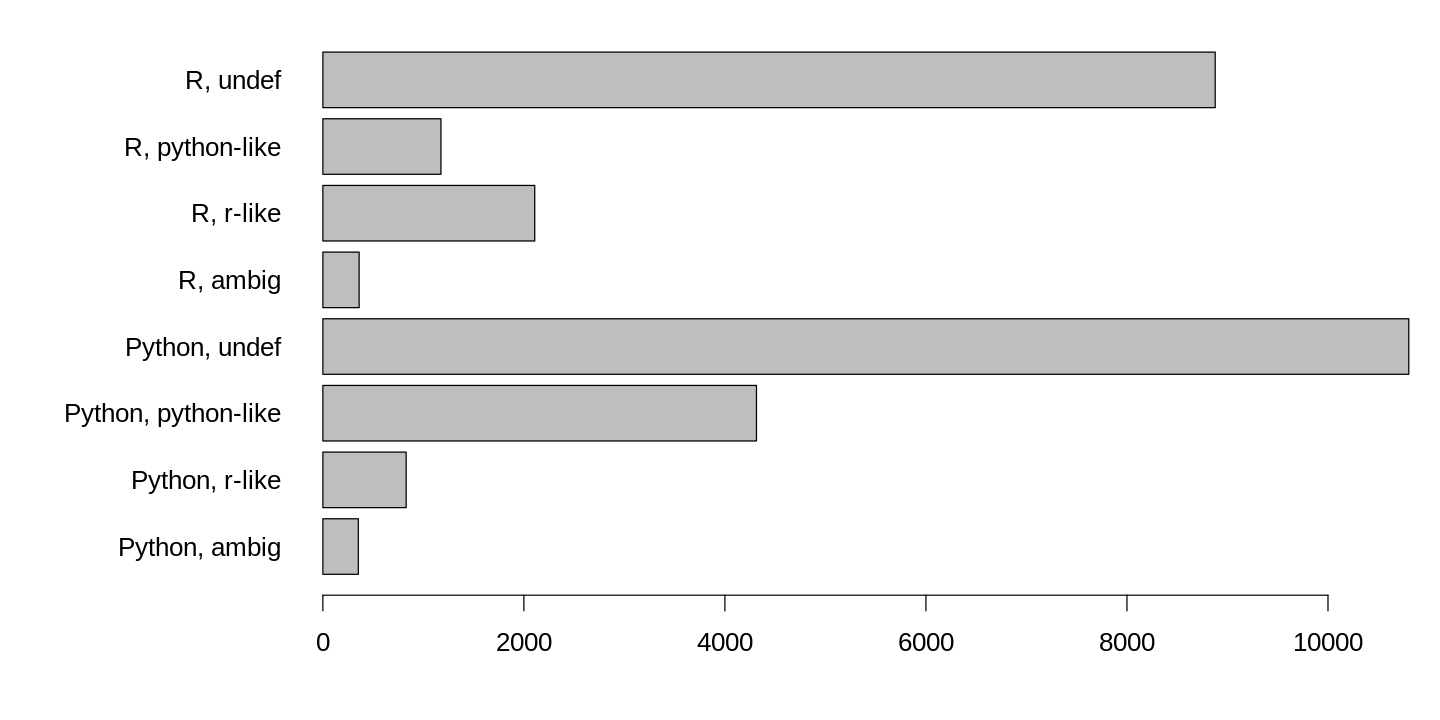

In [181]:
langs = c('R-n','R-p','R-r','R-b','Python-n','Python-p','Python-r','Python-b')
names = c('R, undef','R, python-like','R, r-like','R, ambig','Python, undef','Python, python-like','Python, r-like','Python, ambig')
names(names) = langs
par(mar=c(4,10,1,1),cex=1.3)
barplot(table(nlang[f])[rev(langs)],horiz = T,names.arg = rev(names),las=1)

In [182]:
t = as.matrix(table(nlang,as.numeric(substr(gh$created_at,1,4))))
t = t[order(apply(t,1,sum),decreasing = T),]
tn = sweep(t,2,apply(t,2,sum),'/')*100
tn = tn[,apply(t,2,sum)>199]

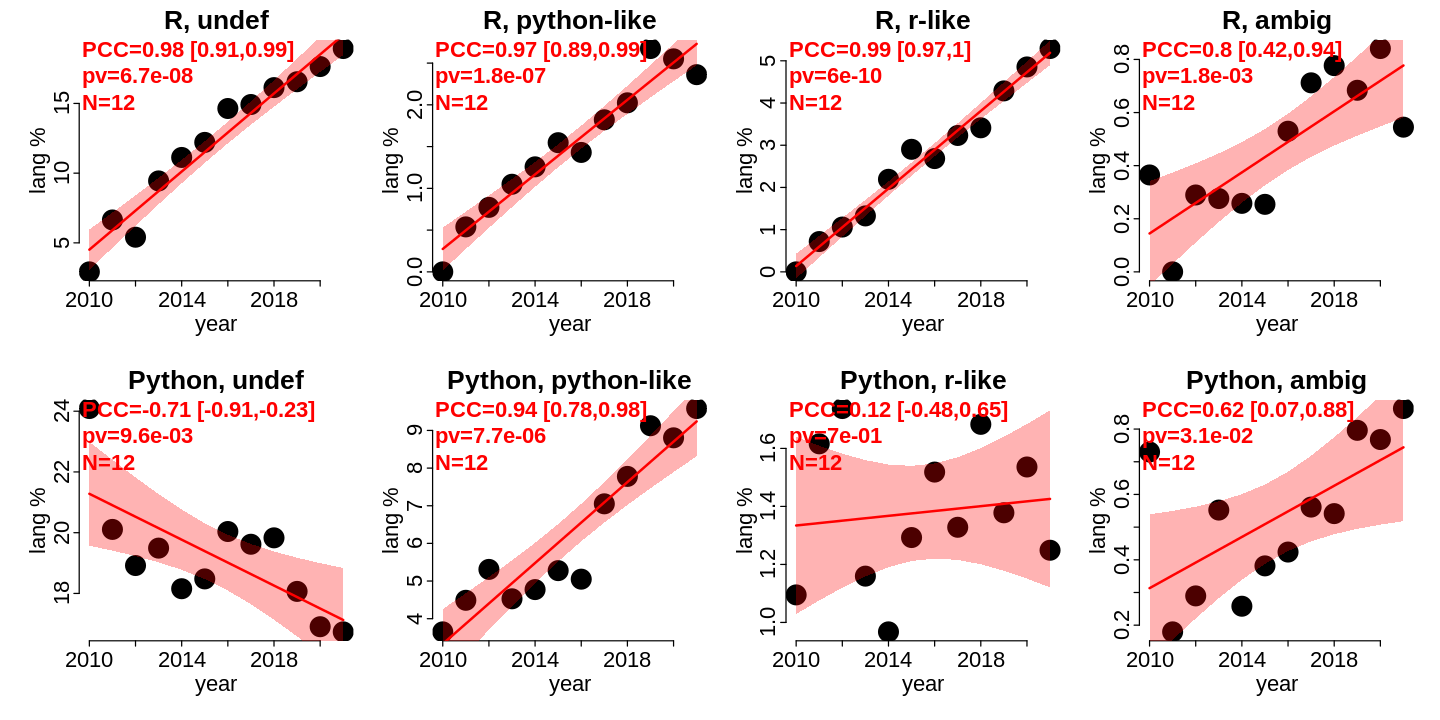

In [183]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(2,4),tcl=-0.2,mgp=c(1.1,0.2,0),mar=c(3,3,1.5,0),oma=c(0,0,0,1),bty='n',cex=1.1)
for(l in langs)
    plotLine(colnames(tn),tn[l,],pch=19,xlab='year',ylab='lang %',cex=2,line.lwd = 2,plot.ci = T,main=names[l])
